In [ ]:
!mkdir /root/.kaggle/
!pip install pandas
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
%matplotlib inline
 
 
# Installing the Kaggle package
!pip install kaggle 
 
#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"USERNAME","key":"KEYKEYKEY"}
 
# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


#Q1

In [ ]:
!kaggle datasets download -d shivam2503/diamonds -p ./datasets/diamonds/
!unzip ./datasets/diamonds/*.zip  -d ./datasets/diamonds/

diamonds_df = pd.read_csv('/content/datasets/diamonds/diamonds.csv')

diamonds.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/diamonds/diamonds.zip
replace ./datasets/diamonds/diamonds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
diamonds_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##1

In [ ]:
corr1, _ = pearsonr(diamonds_df['carat'], diamonds_df['price'])
corr1

0.9215913011934771

##2

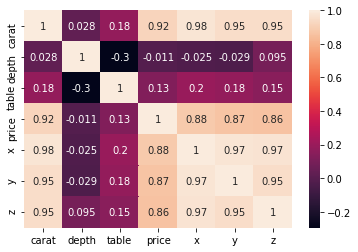

In [ ]:
col = ['carat','depth','table',	'price','x', 'y',	'z']
df2 = diamonds_df[col]
corr2 = df2.corr()
sns.heatmap(corr2,
            xticklabels=corr2.columns, 
            yticklabels=corr2.columns, 
            annot=True)

##3

In [ ]:
cut_srtd = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
dic = dict()
linreg = LinearRegression()  
 
for i in cut_srtd:
  diamonds_df2 = diamonds_df[diamonds_df['cut'] == i]
  val_lis = [[x] for x in diamonds_df2['carat'].values]
  linreg.fit(val_lis, diamonds_df2['price'].values)
  a, c = linreg.coef_, linreg.intercept_
  def line_func(x, a=a, c=c):
    return a * x + c 
  dic[i] = line_func
 
  print(f"{i}: {linreg.coef_[0]}x{'+' if linreg.intercept_ > 0 else ''}{linreg.intercept_} = Expected price")

Ideal: 8192.391303750845x-2300.373685458004 = Expected price
Premium: 7807.752032223519x-2379.9049641635793 = Expected price
Very Good: 7935.971964580969x-2417.6602432811633 = Expected price
Good: 7479.636302868243x-2422.728047570197 = Expected price
Fair: 5924.495106234301x-1839.0736754834215 = Expected price


##4

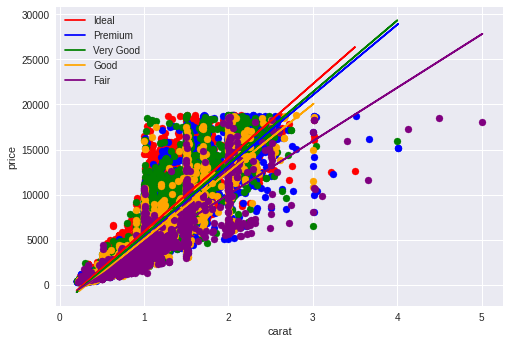

In [ ]:
color_lis = ['red', 'blue', 'green', 'orange', 'purple']
plt.style.use('seaborn')
for c, (cut, func) in zip(color_lis, dic.items()):
  diamonds_df2 = diamonds_df[diamonds_df['cut'] == cut]
  predict_y = [func(t) for t in diamonds_df2['carat']]
  plt.scatter(diamonds_df2['carat'], diamonds_df2['price'], c=c)

  #plot the regression line
  plt.plot(diamonds_df2['carat'], predict_y, color=c)  
  
plt.xlabel("carat")
plt.ylabel("price")
plt.legend(cut_srtd)


##5

In [ ]:
col = ['carat', 'depth', 'table', 'x', 'y', 'z']
diamonds_df.dropna()

y = diamonds_df['price']
X = diamonds_df[col]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
mlinreg = LinearRegression()
mlinreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
str = ''
for i in range(len(col)):
  str += f"{mlinreg.coef_[i]} * {col[i]} + "
str += f"{mlinreg.intercept_} = Expected price"
print(str)

10835.417068656323 * carat + -208.221187307827 * depth + -99.6477000551508 * table + -1356.3544356172918 * x + 47.52799211871479 * y + 44.37267177492396 * z + 21216.2607764833 = Expected price


### MAE

In [ ]:
y_pred = mlinreg.predict(X_test)

metrics.mean_absolute_error(y_test,y_pred)

887.4996078971346

### RMSE

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1496.5496708954893

#Q2

In [ ]:
!kaggle datasets download -d doaaalsenani/usa-cers-dataset -p ./datasets/cars/
!unzip ./datasets/cars/*.zip  -d ./datasets/cars/

cars_df = pd.read_csv('/content/datasets/cars/USA_cars_datasets.csv')

  0% 0.00/65.9k [00:00<?, ?B/s]
100% 65.9k/65.9k [00:00<00:00, 25.2MB/s]
Archive:  ./datasets/cars/usa-cers-dataset.zip
  inflating: ./datasets/cars/USA_cars_datasets.csv  


In [ ]:
cars_df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


## 1

y = -0.0813424590519796 * x + 23021.77515024407


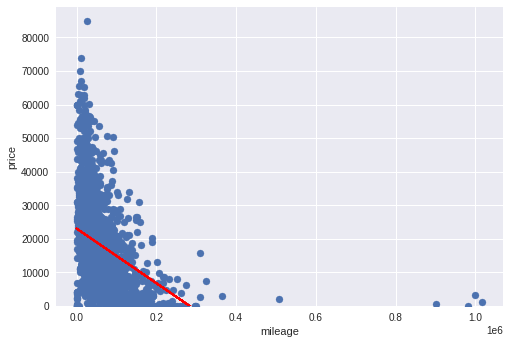

In [ ]:
linreg = LinearRegression()
sqrt_list_of_list = [[i] for i in cars_df['mileage'].values] 
linreg.fit(sqrt_list_of_list, cars_df['price'].values)

print(f'y = {linreg.coef_[0]} * x + {linreg.intercept_}')
linear_func = lambda x: (linreg.coef_)*x + linreg.intercept_ #the model
predict_y_values = [linear_func(x) for x in cars_df['mileage']]
plt.scatter(cars_df['mileage'], cars_df['price'])
plt.xlabel("mileage")
plt.ylabel("price")
plt.ylim(0,)


#plot the regression line
plt.plot(cars_df['mileage'],predict_y_values, color='red' )

## 2

In [ ]:
dodge_df = cars_df[cars_df['brand'] == 'dodge']
col = ['year', 'mileage']
X_train, X_test, y_train, y_test = train_test_split(dodge_df[col], dodge_df['price'])
mlinreg = LinearRegression()
mlinreg.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
str = ''
for i in range(len(col)):
  str += f"{mlinreg.coef_[i]} * {col[i]} + "
str += f"{mlinreg.intercept_} = Expected price"
print(str)

-468.14057102044944 * year + -0.17659866329906326 * mileage + 970236.0283904296 = Expected price


In [ ]:
import plotly.graph_objs as go

fig = px.scatter_3d(dodge_df, x ='year', y='mileage', z='price') 
a,b,c = mlinreg.coef_[0],mlinreg.coef_[1], mlinreg.intercept_

x = np.linspace(1886,2060,10)
y = np.linspace(0,250000,10)

X,Y = np.meshgrid(x,y)
Z = (a*X+b*Y+c)
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=X, y=Y, z=Z, name='pred_surface'))